In [119]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util

%matplotlib inline

In [143]:
reload(test_data)
reload(dual_certificates)

N = 16
m = 4
fc = 30
min_separation = 0.25 / N

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.uniform_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_multidim(N, m)

interpolator_1 = dual_certificates.interpolate_multidim(support, sign_pattern, kernel)
interpolator_2 = dual_certificates.interpolate_multidim_wDer(support, sign_pattern, kernel)

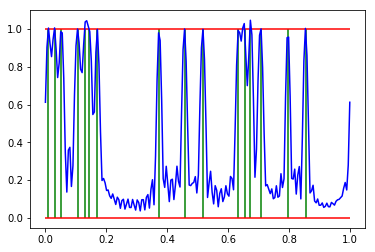

In [144]:
reload(plt_util)
plt_util.plot_trig_poly_magnitude(interpolator_1)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

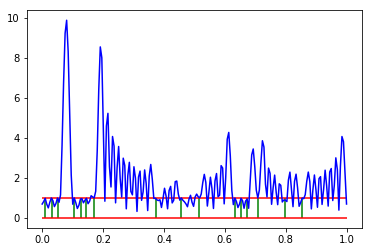

In [145]:
plt_util.plot_trig_poly_magnitude(interpolator_2)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [4]:
sign_pattern[0, :]

array([-0.08566739-0.07479303j, -0.60142093-0.33267824j,
        0.46416415+0.03253649j, -0.41676883-0.35281995j])

In [5]:
interpolator_1(support[0])

array([[-0.08566739-0.07479303j],
       [-0.60142093-0.33267824j],
       [ 0.46416415+0.03253649j],
       [-0.41676883-0.35281995j]])

In [6]:
reload(dual_certificates)
dual_certificates.validate(support, sign_pattern, interpolator_1)

{'bound_achieved': False, 'status': False, 'values_achieved': False}